<h1 style="font-family: Arial; font-weight: 900; color: magenta; text-align: center;">INTRO TO PYTORCH</h1><br>

<br><br><font color='darkpink'>Notations : PyTorch, alike TensorFlow and other IT libraries, does not use the more natural notations found in mathematical texts or usual DL diagrams : in any layer, the rows, not the columns, represent the images of the input instances.</font>

<br/><div style="font-family: Arial; color: darkblue; font-size: 16; font-weight: 600; "><a id="toc"></a>
In this part 12:
    <p style="margin: 0 0 0 2rem; font-weight: 800">[1. Pytorch tensors](#1)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[1a. Initialization, shape and type of a tensor](#1a)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[1b. Arithmetic operations with tensors](#1b)</p>
    <p style="margin: 0 0 0 2rem; font-weight: 800">[2. Datasets and DataLoaders](#2)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[2a. Creating a DataLoader from existing tensors](#2a)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[2b. Subclasses of Dataset](#2b)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[2c. Creating a dataset from files stored locally](#2c)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[2d. Fetching a torchvision dataset](#2d)</p>
    <p style="margin: 0 0 0 2rem; font-weight: 800">[3. Building an ANN in PyTorch](#3)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[3a. torch.nn, the PyTorch NN module](#3a)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[3b. Linear regression with torch.nn and torch.optim](#3b)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[3c. The various steps for building an ANN](#3c)</p>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from colorama import Fore, Back, Style
# define some strings for cleaner codes
BB = Fore.BLUE + Style.BRIGHT
MB = Fore.MAGENTA + Style.BRIGHT
GB = Fore.GREEN + Style.BRIGHT

<a id="1"></a><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>1. PYTORCH TENSORS</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1a. Initialization, shape and type of a tensor</font><a id="1a"></a></p>$\quad$
        Pytorch tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data. Tensors are also optimized for automatic differentiation.<br>$\quad$
        Tensors can be initialized in various ways. In general we will start either with a Python array, by using the <font color='green'>torch.tensor</font> method, or with a Numpy array, by using the <font color='green'>torch.from_numpy</font> method :

In [2]:
a = [[1,2,3],[4,5,6]]
t_a = torch.tensor(a)
print(BB + "Pytorch tensor from a Python array :\n" + MB, t_a)

n_a = np.array(a, dtype=np.int32)
t_n_a = torch.from_numpy(n_a)
print(BB + "Pytorch tensor from a Numpy array :\n" + MB, t_n_a)

Pytorch tensor from a Python array :
 tensor([[1, 2, 3],
        [4, 5, 6]])
Pytorch tensor from a Numpy array :
 tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)


<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We may also initialize a tensor of $0$s, via the <font color='green'>torch.zeros</font> method; a tensor of $1$s, via the <font color='green'>torch.ones</font> method; a tensor of random numbers uniformly chosen in $[0;1[$, via the <font color='green'>torch.rand</font> method; or a tensor of random numbers chosen according to a normal law of mean <font color='green'>mean</font> and standard deviation <font color='green'>std</font>, via the <font color='green'>torch.normal(mean, std, size)</font> method.<br>$\quad$
        <font color='green'>torch.arange(start=0, end, step=1, dtype=None)</font> creates a 1D array of elements, starting at <font color='green'>start<font color='darkblue'> and moving towards <font color='green'>end</font> by increments of size <font color='green'>step</font>, but stopping before reaching (or crossing) <font color='green'>end</font>; one may specify the type of the elements.<br>$\quad$
        We can create a random tensor of any size by using <font color='green'>torch.rand</font> or <font color='green'>torch.normal(mean, std)</font>; the first method returns components following the uniform distribution over $[0;1[$, and the second returns components following the normal distribution of mean <font color='green'>mean</font> and of standard deviation <font color='green'>std</font>. Before using <font color='green'>torch.rand</font> or <font color='green'>torch.normal</font>, we can set a seed to ensure reproducibility via <font color='green'>torch.manual_seed(n)</font>, where <font color='green'>n</font> is any integer :

In [3]:
t_zeros = torch.zeros(2, 3)
print(BB + "Pytorch 2*3 tensor of 0s :\n" + MB, t_zeros)

t_ones = torch.ones(2, 3)
print(BB + "Pytorch 2*3 tensor of 1s :\n" + MB, t_ones)

t_step = torch.arange(10, 1, step=-2)
print(BB + "1D Pytorch step tensor :\n" + MB, t_step)

torch.manual_seed(1)
t_rand = torch.rand(2,3)
print(BB + "Pytorch 2*3 tensor of random numbers uniformly chosen in [0;1[ :\n" + MB, t_rand)

t_norm = torch.normal(0, 1, (2,3))
print(BB + "Pytorch 2*3 tensor of random numbers chosen according to a normal law :\n" + MB, t_norm)

Pytorch 2*3 tensor of 0s :
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Pytorch 2*3 tensor of 1s :
 tensor([[1., 1., 1.],
        [1., 1., 1.]])
1D Pytorch step tensor :
 tensor([10,  8,  6,  4,  2])
Pytorch 2*3 tensor of random numbers uniformly chosen in [0;1[ :
 tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]])
Pytorch 2*3 tensor of random numbers chosen according to a normal law :
 tensor([[ 0.5636,  1.1431,  0.8590],
        [ 0.7056, -0.3406, -1.2720]])


<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We may retrieve a component, a row, or a column as usual :

In [4]:
print(BB + "The component (1,2) of a tensor t_a is t_a[1,2] :" + MB, t_a[1,2])
print(BB + "Its first row is t_a[0] :" + MB, t_a[0])
print(BB + "And its second column is t_a[:,1] :" + MB, t_a[:,1])

The component (1,2) of a tensor t_a is t_a[1,2] : tensor(6)
Its first row is t_a[0] : tensor([1, 2, 3])
And its second column is t_a[:,1] : tensor([2, 5])


<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We may retrieve the shape of a tensor, via the <font color='green'>.shape</font> attribute, or the type of its components, via the <font color='green'>.dtype</font> attribute :

In [5]:
print(BB + "Shape of a tensor :" + MB, t_a.shape)
print(BB + "Type of a tensor built from a Python array :" + MB, t_a.dtype)
print(BB + "Type of a tensor built from a Numpy array of type np.int32 :" + MB, t_n_a.dtype)

Shape of a tensor : torch.Size([2, 3])
Type of a tensor built from a Python array : torch.int64
Type of a tensor built from a Numpy array of type np.int32 : torch.int32


<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We may modify the type of a tensor, by using the <font color='green'>.to<font color='darkblue'> method :

In [6]:
t_n_a_new = t_n_a.to(torch.int64)
print(BB + "New type of a tensor :" + MB, t_n_a_new.dtype)

New type of a tensor : torch.int64


<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We may reshape a tensor, via the <font color='green'>.reshape</font> method :

In [7]:
z = torch.zeros(6)
print(BB + "Reshape a tensor :\n" + MB, z.reshape(2,3))

Reshape a tensor :
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We may concatenate a sequence of tensors along a given dimension by using the <font color='green'>torch.cat</font> method :

In [8]:
t1 = torch.cat([t_a, t_a, t_a], dim=1)
t2 = torch.cat([t_a, t_a], dim=0)
print(BB + "Concatenation : torch.cat([t_a, t_a, t_a], dim=1) =\n" + MB, t1)
print(BB + "Concatenation : torch.cat([t_a, t_a], dim=0) =\n" + MB, t2)

Concatenation : torch.cat([t_a, t_a, t_a], dim=1) =
 tensor([[1, 2, 3, 1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6, 4, 5, 6]])
Concatenation : torch.cat([t_a, t_a], dim=0) =
 tensor([[1, 2, 3],
        [4, 5, 6],
        [1, 2, 3],
        [4, 5, 6]])


<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Conversely, we may split a tensor into smaller pieces along a dimension, with <font color='green'>torch.split(tensor, split_size_or_sections, dim=0)</font>.<br>
    <font color='green'>split_size_or_sections</font> may be an integer or a list.<br>
    If it is an integer, say $n$, then <font color='green'>tensor</font> will be split into chunks of size $n$ along the dimension <font color='green'>dim<font color='darkblue'>; if <font color='green'>tensor</font>'s size is not divisible by $n$ in this direction, then the last chunk will have a smaller size.<br>
    If <font color='green'>split_size_or_sections</font> is a list, then <font color='green'>tensor</font> will be split into len(<font color='green'>split_size_or_sections</font>) chunks with sizes in <font color='green'>dim</font> according to <font color='green'>split_size_or_sections</font>.<br>$\quad$
        For example :

In [9]:
print(BB + "Split : torch.split(t1, 2) =" + MB, torch.split(t1, 2))
print(BB + "Split : torch.split(t1, 4, dim=1) =" + MB, torch.split(t1, 4, dim=1))
print(BB + "Split : torch.split(t1, [4,2,3], dim=1) =" + MB, torch.split(t1, [4,2,3], dim=1))

Split : torch.split(t1, 2) = (tensor([[1, 2, 3, 1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6, 4, 5, 6]]),)
Split : torch.split(t1, 4, dim=1) = (tensor([[1, 2, 3, 1],
        [4, 5, 6, 4]]), tensor([[2, 3, 1, 2],
        [5, 6, 4, 5]]), tensor([[3],
        [6]]))
Split : torch.split(t1, [4,2,3], dim=1) = (tensor([[1, 2, 3, 1],
        [4, 5, 6, 4]]), tensor([[2, 3],
        [5, 6]]), tensor([[1, 2, 3],
        [4, 5, 6]]))


<br><br><div style="font-family: Arial; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1b. Arithmetic operations with tensors</font><a id="1b"></a></p>
    <p style="margin: 0; font-size: 14px; font-weight: 500">$\quad$
        We start with the basic operations :<br>
    * The <font color='darkpink'>scalar multiplication</font> of a tensor <font color='purple'>$t_a$</font> by a scalar $\lambda$ is done by <font color='green'>$\;\lambda * t_a$</font><br>
    * The <font color='darkpink'>sum</font> of two tensors <font color='purple'>$t_a$</font> and <font color='purple'>$t_b$</font> is done by <font color='green'>$\;t_a + t_b$</font><br>
    * The <font color='darkpink'>pointwise multiplication</font> of two tensors <font color='purple'>$t_a$</font> and <font color='purple'>$t_b$</font> is done by <font color='green'>$\;t_a * t_b$</font>, or by <font color='green'>$\;\mbox{torch.multiply}(t_a,t_b)$</font><br>
    * The <font color='darkpink'>transpose</font> of a 2D-tensor <font color='purple'>$t_b$</font> is done by <font color='green'>$\;t_b.T$</font>, <font color='green'>$\;t_b.t()$</font>, or by <font color='green'>$\;t_b.\mbox{transpose}(0,1)$</font><br>
    * The <font color='darkpink'>product</font> of two tensors <font color='purple'>$t_a$</font> and <font color='purple'>$t_c$</font> is done by <font color='green'>$\;t_a \,@\, t_c$</font>, or by <font color='green'>$\;\mbox{torch.matmul}(t_a,t_c())$</font>

In [10]:
t_a = torch.tensor([[1,2,3],[4,5,6]])
t_b = torch.tensor([[-1,0,1],[-2,-3,-4]])
print(BB + "scalar multiplication : -2 * t_a =\n" + MB, -2 * t_a)
print(BB + "sum of two tensors : t_a + t_b =\n" + MB, t_a + t_b)
print(BB + "pointwise multiplication of two tensors : t_a * t_b =\n" + MB, t_a * t_b)
print(BB + "transpose of a tensor : t_b.T =\n" + MB, t_b.T)
print(BB + "product of two tensors : t_a@t_b.t() =\n" + MB, t_a@t_b.t())

scalar multiplication : -2 * t_a =
 tensor([[ -2,  -4,  -6],
        [ -8, -10, -12]])
sum of two tensors : t_a + t_b =
 tensor([[0, 2, 4],
        [2, 2, 2]])
pointwise multiplication of two tensors : t_a * t_b =
 tensor([[ -1,   0,   3],
        [ -8, -15, -24]])
transpose of a tensor : t_b.T =
 tensor([[-1, -2],
        [ 0, -3],
        [ 1, -4]])
product of two tensors : t_a@t_b.t() =
 tensor([[  2, -20],
        [  2, -47]])


<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The <font color='green'>$\;.T$</font> and <font color='green'>$\;.t()$</font> method only work on 2D-tensors, while <font color='green'>$\;t.\mbox{transpose}$</font> can be applied to tensors of any dimensions.<br>$\quad$
        However, while $\forall d_0, d_1 \in \mathbb{N}^{*}$, these methods are identical to the usual transposition of linear operators of $\mathbb{R}^{d_0 \times d_1}$, Pytorch <font color='green'>$\;t.\mbox{transpose}$</font> is not the usual transpose of $t$ when $t$ is not a matrix or a vector.<br>$\quad$
        More precisely, when $t \in \mathbb{R}^{d_0 \times d_1 \times \cdots \times d_L}$ (with $L>\alpha,\beta$), <font color='green'>$\;t.\mbox{transpose}$</font> is obtained via the transposition $s_{\alpha,\beta}$ which swaps indices $\alpha$ and $\beta$ in $\{0,1,\cdots,L\}$ :<font color='green'>
        $$\forall i=(i_0, i_1, \dots, i_L) \qquad \left(t.\mbox{transpose}(\alpha,\beta) \right)[i] = t\left(s_{\alpha,\beta}(i)\right) \,\qquad (1)$$</font>
    For example with $L=3$, if $\;t \in \mathbb{R}^{d_0 \times d_1 \times d_2 \times d_3}\;$ then $\;t.\mbox{transpose}(0,2) \in \mathbb{R}^{d_2 \times d_1 \times d_0 \times d_3}\;$ and<font color='green'>
        $$\;t.\mbox{transpose}(0,2)[i_2, i_1, i_0, i_3] = t[i_0, i_1, i_2, i_3] \,\qquad (2)$$</font><br>$\quad$
        There is another way to write $t.\mbox{transpose}(\alpha,\beta)$ :<font color='green'>
        $$\;\mbox{torch.transpose}(t,\alpha,\beta) := t.\mbox{transpose}(\alpha,\beta) \,\qquad (3)$$

In [11]:
print(BB + "transpose of a tensor : t_b.T =\n" + MB, t_b.T)
print(BB + "transpose of a tensor : t_b.t() =\n" + MB, t_b.t())
print(BB + "transpose of a tensor : t_b.transpose(0,1) =\n" + MB, t_b.transpose(0,1))
print(BB + "transpose of a tensor : torch.transpose(t_b,0,1) =\n" + MB, torch.transpose(t_b,0,1))

transpose of a tensor : t_b.T =
 tensor([[-1, -2],
        [ 0, -3],
        [ 1, -4]])
transpose of a tensor : t_b.t() =
 tensor([[-1, -2],
        [ 0, -3],
        [ 1, -4]])
transpose of a tensor : t_b.transpose(0,1) =
 tensor([[-1, -2],
        [ 0, -3],
        [ 1, -4]])
transpose of a tensor : torch.transpose(t_b,0,1) =
 tensor([[-1, -2],
        [ 0, -3],
        [ 1, -4]])


<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Pytorch can compute the mean (or standard deviation) of a tensor, or its mean (or standard deviation) along a direction, but only if the tensor is of floating point type (<font color='green'>torch.float32</font> or <font color='green'>torch.float64</font>) or of complex type (<font color='green'>torch.complex64</font> or <font color='green'>torch.complex128</font>). If the tensor is of integer type, it must first be cast into one of these types, via the <font color='green'>.to</font> method seen in "1a. Initialization, shape and type of a tensor".<br>$\quad$
        If $t_c$ is any tensor of floating point or complex type, then we may compute its mean via the <font color='green'>.mean()</font> method, or via <font color='green'>torch.mean($t_c$)</font>. Its mean along the $i$-th dimension is computed via <font color='green'>$t_c$.mean(i)</font> or <font color='green'>torch.mean($t_c$,\,i)</font>.<br>$\quad$
        With the same restrictions, we may also compute the standard deviations of a tensor $t_c$, via the <font color='green'>.std()</font> method, or via <font color='green'>torch.std($t_c$)</font>. Its standard deviation along the $i$-th dimension is computed via <font color='green'>$t_c$.std(i)<font color='darkblue'> or <font color='green'>torch.std($t_c$,\,i)</font>.<br>$\quad$
        For clarity one may replace <font color='green'>i<font color='darkblue'> by <font color='green'>dim=i</font> or <font color='green'>axis=i</font>.<br>$\quad$
        For example :

In [12]:
t_a_f = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float64)
print(BB + "mean of a tensor : t_a_f.mean() =\n" + MB, t_a_f.mean())
print(BB + "mean of a tensor along its 0-th dimension : torch.mean(t_a_f, dim=0) =\n" + MB,
      torch.mean(t_a_f, dim=0))
print(BB + "standard deviation of a tensor : t_a_f.std() =\n" + MB, t_a_f.std())
print(BB + "standard deviation of a tensor along its 1-th dimension : torch.std(t_a_f, dim=1) =\n" + MB,
      torch.std(t_a_f, dim=1))

mean of a tensor : t_a_f.mean() =
 tensor(3.5000, dtype=torch.float64)
mean of a tensor along its 0-th dimension : torch.mean(t_a_f, dim=0) =
 tensor([2.5000, 3.5000, 4.5000], dtype=torch.float64)
standard deviation of a tensor : t_a_f.std() =
 tensor(1.8708, dtype=torch.float64)
standard deviation of a tensor along its 1-th dimension : torch.std(t_a_f, dim=1) =
 tensor([1., 1.], dtype=torch.float64)


<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We need to specify the type of a tensor before computing the mean (or standard deviation) of its elements, because the precision of the computations depend on the type. If we have a tensor of integers (like $t_a$), we need to first change its type as we did above, even if the result is an integer; but if we only want to compute the sum of its components, or the sum of its components along any given dimension, we do not need to change its type.<br>$\quad$
        The sum of the components of a tensor $t_a$ is computed via <font color='green'>$t_a.\mbox{sum}()$</font>, or <font color='green'>$\mbox{torch.sum}(t_a)$</font>. And the sum of its components along the dimension $i$ is computed via <font color='green'>$t_a.\mbox{sum}(i)$</font>, or <font color='green'>$\mbox{torch.sum}(t_a,i)$</font>.<br>$\quad$
        As above, one may replace <font color='green'>i</font> by <font color='green'>dim=i</font> or <font color='green'>axis=i</font>.<br>$\quad$
        For example :

In [13]:
print(BB + "sum of the elements of the tensor t_a : t_a.sum() =\n" + MB, t_a.sum())
print(BB + "sum of the elements of the tensor t_a along its 0-th dimension : t_a.sum(dim=0) =\n" + MB,
      t_a.sum(dim=0))

sum of the elements of the tensor t_a : t_a.sum() =
 tensor(21)
sum of the elements of the tensor t_a along its 0-th dimension : t_a.sum(dim=0) =
 tensor([5, 7, 9])


<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The $L^p$-norm, $p \in [1;+\infty[$, of a tensor $t1$ requires the computation of a power $1/p \in ]0;1]$, so here again we need a tensor of a floating point or complex type.<br>$\quad$
        Then, its $L^p$-norm is <font color='green'>torch.linalg.vector_norm(t1, ord=$p$)</font>. By default ord=$2$. We can also compute the $L^p$-norm of the tensor along its $i$-th dimension, by <font color='green'>torch.linalg.vector_norm(t1, ord=$p$, dim=i)</font>. In both cases, the default value for <font color='green'>ord</font> is $2$.<br>$\quad$
        The $L^{\infty}$-norm of a tensor $t1$ still needs $t1$ to be of a floating point or complex type (?!). It is computed by <font color='green'>torch.linalg.vector_norm(t1, ord=float('inf'))</font>.
        For example :

In [14]:
t1 = torch.tensor([[3.,4.],[6.,8.]])
print(BB + "L1-norm of the tensor t1 : torch.linalg.vector_norm(t1, ord=1)\n" + MB,
      torch.linalg.vector_norm(t1, ord=1))
print(BB + "Euclidean norm of the tensor t1 along its 1-th dimension : " +
      "torch.linalg.vector_norm(t1, dim=1)\n" + MB, torch.linalg.vector_norm(t1, dim=1))
print(BB + "L∞ norm of the tensor t1 : torch.linalg.vector_norm(t1, ord=float('inf'))\n" + MB,
      torch.linalg.vector_norm(t1, ord=float('inf')))

L1-norm of the tensor t1 : torch.linalg.vector_norm(t1, ord=1)
 tensor(21.)
Euclidean norm of the tensor t1 along its 1-th dimension : torch.linalg.vector_norm(t1, dim=1)
 tensor([ 5., 10.])
L∞ norm of the tensor t1 : torch.linalg.vector_norm(t1, ord=float('inf'))
 tensor(8.)


<a id="2"></a><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>2. DATASETS AND DATALOADERS</font></h4><br>$\quad$
        Code for preprocessing data samples (eg mean centering, scaling, shuffling,...) can get messy and hard to maintain. So, ideally, we want our dataset code to be decoupled from our model training code, for better readability and modularity. PyTorch provides two data primitives: <font color='green'>torch.utils.data.Dataset</font> and <font color='green'>torch.utils.data.DataLoader</font> that allow us to use pre-loaded datasets as well as our own data. <font color='green'>Dataset</font> stores the samples and their corresponding labels, and <font color='green'>DataLoader</font> wraps an iterable around the <font color='green'>Dataset</font> to enable easy access to the samples.

<div style="font-family: Arial; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2a. Creating a DataLoader from existing tensors</font><a id="2a"></a></p>
    <p style="margin: 0; font-size: 14px; font-weight: 500">$\quad$
        If the data already exists in the form of a tensor object, a Python list, or a NumPy array, we can easily create a dataset loader using <font color='green'>torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False, drop_last=False)</font> (there are many other possible parameters, but for now only these four make sense) :<br>
    * <font color='green'>dataset</font> specifies the dataset from which to load the data<br>
    * <font color='green'>batch_size</font> specifies the number of samples per batch to load<br>
    * <font color='green'>shuffle</font> specifies if the data should be reshuffled at every epoch (default: <font color='green'>False</font>)<br>
    * <font color='green'>drop_last</font> specifies whether or not the last batch should be dropped if its size is less than <font color='green'>batch_size</font> (when the dataset size is not divisible by the batch size)<br>
    It returns an object of the <font color='green'>DataLoader</font> class, which we can use to iterate through the individual elements in the input dataset. As a simple example, consider the following code, which creates a dataset from a list of values from $0$ to $4$ :

In [15]:
from torch.utils.data import DataLoader
t = torch.arange(5, dtype=torch.float32)
data_loader = DataLoader(t, shuffle=False)

<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can easily iterate through a dataset entry by entry :

In [16]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])


<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        If we want to create batches from this dataset, with a desired batch size of $2$, we can do this as follows :

In [17]:
data_loader = DataLoader(t, batch_size=2, drop_last=False)
# the first value for 'i' (ie the batch number) should be '1' and not '0', hence the '1' in '(data_loader, 1)'
for i, batch in enumerate(data_loader, 1):
    print(BB + "batch", i, ":" + MB, batch)

batch 1 : tensor([0., 1.])
batch 2 : tensor([2., 3.])
batch 3 : tensor([4.])


<br><div style="font-family: Arial; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2b. Subclasses of Dataset</font><a id="2b"></a></p>
    <p style="margin: 0; font-size: 14px; font-weight: 500">$\quad$
        The <font color='green'>Dataset</font> class is almost empty. It has no <font color='green'>\_\_getitem__</font> method to fetch a sample from a given key, and no <font color='green'>\_\_len__</font> to return the size of the dataset. Its implementation is given here : https://pytorch.org/docs/stable/_modules/torch/utils/data/dataset.html#Dataset<br>$\quad$
        Consequently, in order to use a dataset that represents a map from keys (eg $\{1,\cdots,m\}$) to data samples, we first need to build a subclass of <font color='green'>Dataset</font>, which must have a <font color='green'>\_\_getitem__</font> and a <font color='green'>\_\_len__</font> methods.<br>$\quad$
        As an example, suppose some data is given in two tensors, one for the instances and another for the labels. It could be more practical to join these two tensors, eg this will simplify shuffling (eg at the start of epochs) without decoupling. In order to combine two tensors into a joint dataset, we can use the following subclass of <font color='green'>Dataset</font> :

In [18]:
from torch.utils.data import Dataset

# defines a new class called 'JointDataset', which is a subclass of 'Dataset'
class JointDataset(Dataset):
    # defines the constructor method; it initializes the object with two inputs, 'x' and 'y', which will
    # typically be the tensors representing the instance matrix and the labels, respectively
    def __init__(self, x, y):
        # saves the inputs 'x' and 'y' as the instance variables 'self.x' and 'self.y'
        self.x = x
        self.y = y

    # defines the necessary '__len__' method, which returns the number of elements in the dataset
    def __len__(self):
        return len(self.x)

    # defines the necessary '__getitem__' method, which retrieves a data sample by its index 'idx'
    def __getitem__(self, idx):
        # the dataset entry corresponding to 'idx' will be the tuple (self.x[idx], self.y[idx])
        return self.x[idx], self.y[idx]

<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        For example, let's create an input matrix $\,t_X\,$ with $4$ instances of $3$ features, whose target vector $\,t_y\,$ is $[0, 1, 2, 3]$; and, from them, the joint dataset $\mbox{joint\_dataset}$ :

In [19]:
torch.manual_seed(1)
t_X = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
joint_dataset = JointDataset(t_X, t_y)

<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        $\mbox{joint\_dataset}$ has the $4$ following rows :

In [20]:
for i, example in enumerate(joint_dataset, 1):
    print(BB + "x" + str(i) + " :" + MB, example)

x1 : (tensor([0.7576, 0.2793, 0.4031]), tensor(0))
x2 : (tensor([0.7347, 0.0293, 0.7999]), tensor(1))
x3 : (tensor([0.3971, 0.7544, 0.5695]), tensor(2))
x4 : (tensor([0.4388, 0.6387, 0.5247]), tensor(3))


<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Now, let’s create a shuffled version data loader from the $\mbox{joint\_dataset}$ dataset :

In [21]:
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True, drop_last=True)

<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        When we train a model using Stochastic Gradient Descent (SGD), we shuffle the input matrix at the start of each epoch. In order to check that the shuffling works as intended, let’s iterate over the batched dataset twice. Note that the batches are not the same, and that the rows are shuffled without losing the one-to-one correspondence between the entries in X and y.

In [22]:
for epoch in range(1,3):
    print(BB + "epoch", epoch, ":")
    for i, batch in enumerate(data_loader, 1):
        print(BB + "batch", i, ": X_" + str(i) + " :" + MB, batch[0],
              BB + "\n\ty_" + str(i) + " :" + MB, batch[1])

epoch 1 :
batch 1 : X_1 : tensor([[0.7576, 0.2793, 0.4031],
        [0.4388, 0.6387, 0.5247]]) 
	y_1 : tensor([0, 3])
batch 2 : X_2 : tensor([[0.3971, 0.7544, 0.5695],
        [0.7347, 0.0293, 0.7999]]) 
	y_2 : tensor([2, 1])
epoch 2 :
batch 1 : X_1 : tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
	y_1 : tensor([1, 3])
batch 2 : X_2 : tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
	y_2 : tensor([2, 0])


<br><div style="font-family: Arial; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2c. Creating a dataset from files stored locally</font><a id="2c"></a></p>
    <p style="margin: 0; font-size: 14px; font-weight: 500">$\quad$
        In this section, we will build a dataset from $6$ images stored in a folder, "cat_dog_images", provided by S. Raschka (on his book's Github); there are $3$ cats and $3$ dogs. This small dataset will show how building a dataset from stored files generally works.<br>$\quad$
        To accomplish this, we are going to use two additional modules: <font color='green'>Image</font>, from <font color='green'>PIL</font>, to read the image file contents and <font color='green'>transforms</font>, from <font color='green'>torchvision</font>, to decode the raw contents and resize the images. <font color='green'>torchvision</font> was installed when installing Pytorch with the recommended command, and <font color='green'>PIL</font>, which originally stood for <font color='green'>Python Imaging Library</font> (which was discontinued in 2011 and replaced by its backward compatible '<font color='green'>Pillow</font>' fork), now refers to the <font color='green'>Pillow</font> library, which has been installed automatically when installing <font color='green'>torchvision</font>.<br>$\quad$
        Before we start, let’s take a look at the $6$ images (the files' names and their contents) :

In [23]:
# imports the 'pathlib' module, which provides classes for working with files and directories. It's more
# modern than 'os.path' for manipulating paths; it uses methods on Path objects instead of functions.
import pathlib

# pathlib.Path() creates an object that points to the given path ("cat_dog_images", which is relative to the
# folder where the code is run since it has no separator - '/' or '\' -)
imgdir_path = pathlib.Path("cat_dog_images")
# 'glob' returns an iterator (of Path objects) for all files pointed by 'imgdir_path' whose names contain the
# given string (ie here, all the '.jpg' files)
# 'str' converts these Path objects into strings, and 'sorted' sorts these strings in ascending order
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(GB, file_list)

 ['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


 Image shape: (900, 1200, 3)
 Image shape: (900, 1200, 3)
 Image shape: (900, 742, 3)
 Image shape: (800, 1200, 3)
 Image shape: (800, 1200, 3)
 Image shape: (900, 1200, 3)


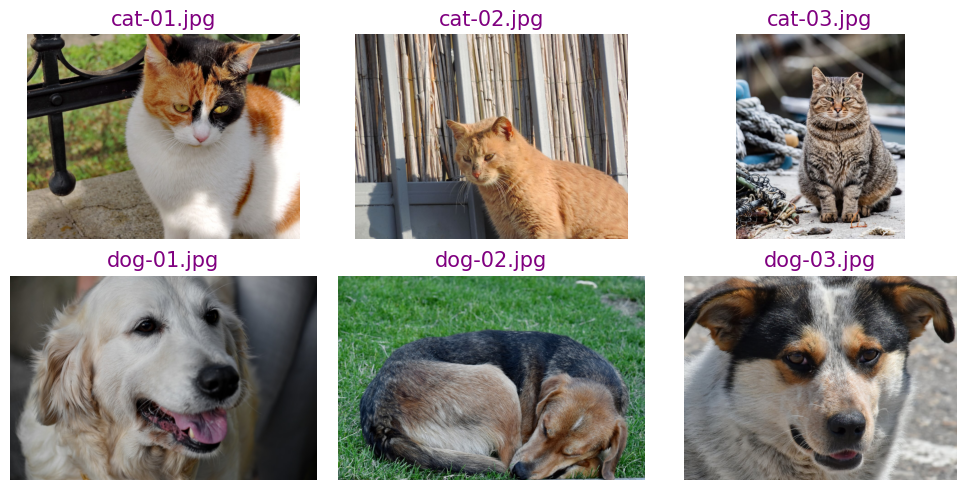

In [24]:
# imports the os module for interacting with the operating system (here used to manipulate file paths)
import os
# imports the Image module, which is used for opening, manipulating, and saving various image file formats
from PIL import Image

# initializes a figure object of size 10*5 inches (potentially downscaled) where subplots will be added
fig = plt.figure(figsize=(10, 5))
# 'file_list' has been defined and printed in the previous cell; 'enumerate' follows the list and provides
# both the index ('i') and the file name ('file') for each iteration
for i, file in enumerate(file_list):
    # 'Image.open' is a Pillow function which opens the image file and creates an Image object
    img = Image.open(file)
    # 'np.array' converts it into a Numpy array; and '.shape' returns the dimensions of the array, typically
    # (height, width, channels) for color images ("channels" is the number of integers used to describe the
    # image - eg 1 for grayscale images, 3 for rgb images, 4 for rgba images ie rgb images with a channel for
    # transparency -)
    print(GB, 'Image shape:', np.array(img).shape)
    # adds a 2*3 grid of subplots; 'matplotlib' requires subplot indices to start at 1, but here the first
    # value for 'i' will be 0, so we need to add 1
    ax = fig.add_subplot(2, 3, i+1)
    # removes axes (and their ticks) for a cleaner appearance
    ax.axis('off')
    # sets the title of the subplot : the text will be 'os.path.basename(file)', ie the file name (eg
    # "cat1.jpg") extracted from the file path, and its size will be 15
    ax.set_title(os.path.basename(file), size=15, color="purple")
    # displays the Image object 'img' in the subplot
    ax.imshow(img)
# adjusts the spacing between subplots
plt.tight_layout()
# displays the figure with all the subplots
plt.show()

<br><p style="margin: 0; font-size: 14px; font-weight: 500"><font color='darkblue'>$\quad$
        The correct labels for these images (cat or dog) can be obtained from their file names. Let's assign the label $0$ for cats and $1$ for dogs :

In [25]:
labels = [1 if "dog" in os.path.basename(file) else 0 for file in file_list]
print(BB + "The list of correct labels is :" + MB, labels)

The list of correct labels is : [0, 0, 0, 1, 1, 1]


<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Now we have two lists : <font color='green'>file_list</font>, a list of filenames, and <font color='green'>labels</font>, the list of their labels. Let's join them together in a dataset, alike what we did in cell $18$ in "2b. Subclasses of Dataset" :

In [26]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.file_list[idx], self.labels[idx]


image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(BB + "filename :" + GB, file, BB + "    label :" + MB, label)

filename : cat_dog_images\cat-01.jpg     label : 0
filename : cat_dog_images\cat-02.jpg     label : 0
filename : cat_dog_images\cat-03.jpg     label : 0
filename : cat_dog_images\dog-01.jpg     label : 1
filename : cat_dog_images\dog-02.jpg     label : 1
filename : cat_dog_images\dog-03.jpg     label : 1


<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        One problem with our images is that they are not of the same size (see output of cell 24). So, in order to place them all in the same input matrix, we need to resize the images to a desired size, for example $80 \!\times\! 120$ (where $80$ is the height), and then convert their pixel values into tensors using <font color='green'>ToTensor()</font>.<br>
    <font color='green'>ToTensor()</font> transforms a <font color='green'>PIL</font> image (eg composed of rgb pixels, each holding a red, a green and a blue value, as integers between $0$ and $255$) into a Pytorch tensor (here $3$ matrices, one for each color, with the values divided by $255$ so that each component is in $[0;1]$).<br>
    Note that <font color='purple'>this described the correct order of operations</font>. Indeed, when resizing a tensor associated with an image, <font color='green'>torchvision</font> first converts the tensor into its image format (because in the coding of an image the rgb values of a pixel are located at the same place, whereas they are in $3$ different matrices in the tensor associated to the image).<br>
    Consequently, Raschka's code below is not optimized : it first converts an image into a tensor using <font color='green'>transforms.ToTensor()</font>, then resizes the tensor using <font color='green'>transforms.Resize</font>, which will re-convert the tensor back into the image, resize the image, and then re-convert the image into a tensor (<font color='green'>transforms.Resize</font> outputs an image if the input is an image, and outputs a tensor when the input is a tensor)...<br>
    In the next implementation, that I did with ChatGPT, we first resize the image, and then converts it to a tensor.<br>$\quad$
        For conversion and resizing, the <font color='green'>torchvision.transforms</font> module is often used :

In [27]:
import torchvision.transforms as transforms
img_height, img_width = 80, 120
# 'transforms.ToTensor()' is applied first; it converts the image from a PIL image (or NumPy array) to a
# PyTorch tensor and normalizes the pixel values to the range [0, 1]
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((img_height, img_width), antialias=True)])

<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: purple">$\quad$
        With <font color='green'>transform</font>, images are brutally resized, the original proportions are not kept, the third cat becomes a furball, as we will see below. So I have added a code provided by ChatGPT, to keep the original proportions of the images; my idea was to add padding, that the model will learn to ignore, and ChatGPT did the rest :

In [28]:
# the target dimensions
img_height = 80
img_width = 120

# Custom transform to preserve aspect ratio with padding
class ResizeWithPadding:
    def __init__(self, target_height, target_width):
        self.target_height = target_height
        self.target_width = target_width
        
    def __call__(self, img):
        # Get the original dimensions
        original_width, original_height = img.size

        # Calculate aspect ratio
        aspect_ratio = original_width / original_height
        target_aspect_ratio = self.target_width / self.target_height
        
        if aspect_ratio > target_aspect_ratio:
            # Scale by width
            new_width = self.target_width
            new_height = int(self.target_width / aspect_ratio)
        else:
            # Scale by height
            new_height = self.target_height
            new_width = int(self.target_height * aspect_ratio)
        
        # Resize the image to the new dimensions while preserving aspect ratio
        img_resized = img.resize((new_width, new_height), Image.BILINEAR)

        # Calculate padding
        padding_left = (self.target_width - new_width) // 2
        padding_right = self.target_width - new_width - padding_left
        padding_top = (self.target_height - new_height) // 2
        padding_bottom = self.target_height - new_height - padding_top

        # Apply padding to the image
        img_padded = Image.new("RGB", (self.target_width, self.target_height), (0, 0, 0))  # Black padding
        img_padded.paste(img_resized, (padding_left, padding_top))

        return img_padded

# resizes any image to the target size, using padding to keep initial proportions, then converts the image
# to a tensor
transform_with_padding = transforms.Compose([
    ResizeWithPadding(target_height=img_height, target_width=img_width),
    transforms.ToTensor()])

<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Now we update our <font color='green'>ImageDataset</font> class with the transformations we just defined. We can apply both transformations to it :

In [29]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        img = Image.open(self.file_list[idx])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[idx]
        return img, label

image_dataset = ImageDataset(file_list, labels, transform)
image_dataset_with_padding = ImageDataset(file_list, labels, transform_with_padding)

<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        This results in the following visualizations of the retrieved example images, along with their labels. The first set is obtained with Raschka's <font color='green'>transform</font> pipeline (resizing without padding), and the second is obtained with ChatGPT's <font color='green'>transform_with_padding</font> pipeline (resizing with padding) :

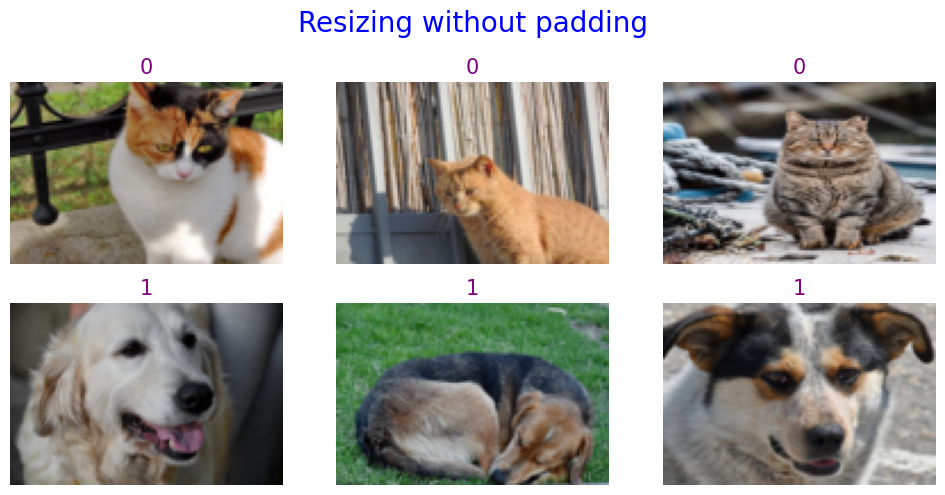

In [30]:
fig = plt.figure(figsize=(10, 5))
for i, (img, label) in enumerate(image_dataset):  # Unpack the tuple (img, label)
    ax = fig.add_subplot(2, 3, i+1)
    ax.axis('off')
    ax.set_title(str(label), size=15, color="purple")
    # converts the tensor img to a numpy array and transposes it so that the number of channels appear last,
    # in accordance with Numpy's notations
    img_np = img.numpy().transpose((1, 2, 0))
    # ensures the pixel values are in the correct range for imshow, ie [0,1]
    img_np = np.clip(img_np, 0, 1)    
    ax.imshow(img_np)
fig.suptitle("Resizing without padding", size=20, color="blue")
# increases vertical space between rows, otherwise the titles of row 1 appear on top of the pictures of row 0
plt.subplots_adjust(hspace=0.6)
plt.tight_layout()
plt.show()

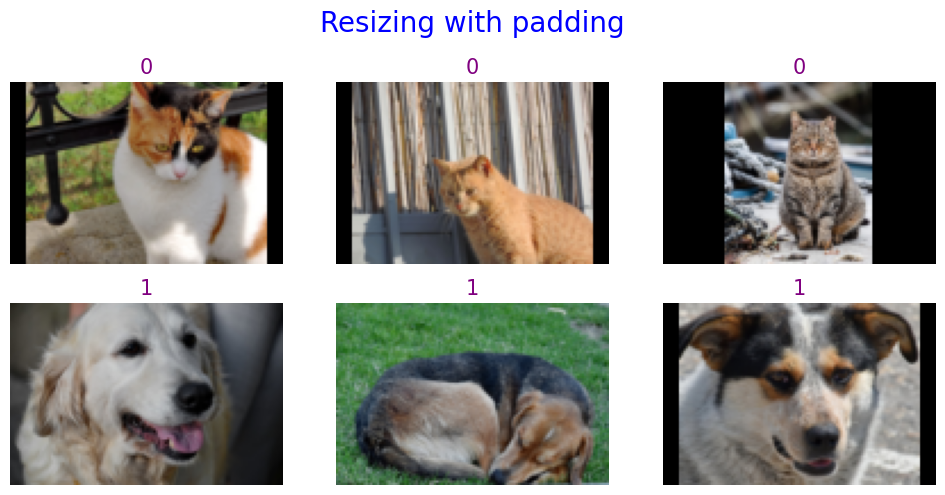

In [31]:
fig = plt.figure(figsize=(10, 5))
for i, (img, label) in enumerate(image_dataset_with_padding):  # Unpack the tuple (img, label)
    ax = fig.add_subplot(2, 3, i+1)
    ax.axis('off')
    ax.set_title(str(label), size=15, color="purple")
    # converts the tensor img to a numpy array and transposes it so that the number of channels appear last,
    # in accordance with Numpy's notations
    img_np = img.numpy().transpose((1, 2, 0))
    ax.imshow(img_np)
fig.suptitle("Resizing with padding", size=20, color="blue")
plt.subplots_adjust(hspace=0.6)
plt.tight_layout()
plt.show()

<br><br><div style="font-family: Arial; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2d. Fetching a torchvision dataset</font><a id="2d"></a></p>
    <p style="margin: 0; font-size: 14px; font-weight: 500">$\quad$
        The <font color='green'>torchvision</font> datasets (https://pytorch.org/vision/stable/datasets.html) are nicely formatted and come with informative descriptions, including the format of features and labels, their type and dimensionality, as well as the link to their original source. Another advantage is that all these datasets are subclasses of <font color='green'>torch.utils.data.Dataset</font>, which allows all the functions we covered in the previous sections to be used directly. So, let’s see how to use these datasets in action.<br>$\quad$
        Let's fetch the <font color='green'>MNIST</font> digit dataset from Pytorch's website. The dataset is presented as a class, <font color='green'>torchvision.datasets.MNIST(root, train=True, transform=None, target_transform=None, download=False)</font>. These parameters are common to many (if not all) torchvision datasets; here is their general meaning :<br>
    * <font color='green'>root</font> specifies where the dataset will be stored<br>
    * <font color='green'>train=True</font> specifies whether to load the training (the default) or the test (<font color='green'>train=False</font>) dataset<br>
    * <font color='green'>transform=None</font> applies the function <font color='green'>transform</font> to the instances; eg <font color='green'>transform=ToTensor()</font> would transform a <font color='green'>PIL</font> image (eg composed of pixels, each holding a red, a green and a blue value, as integers between $0$ and $255$) into a Pytorch tensor (here $3$ matrices, one for each color, with the values divided by $255$ so that each component is in $[0;1]$)<br>
    * <font color='green'>target_transform=None</font> applies the function <font color='green'>target_transform</font> to the target; eg we may use our own function to transform a target vector containing integers (representing classes) into its one-hot version<br>
    * <font color='green'>download=False</font> : if <font color='green'>True</font> then downloads the dataset if it is not already present at <font color='green'>root</font><br>$\quad$
        Further details can be found here : https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html

The first item of the dataset has type : (<PIL.Image.Image image mode=L size=28x28 at 0x22F0E91F800>, 5) 




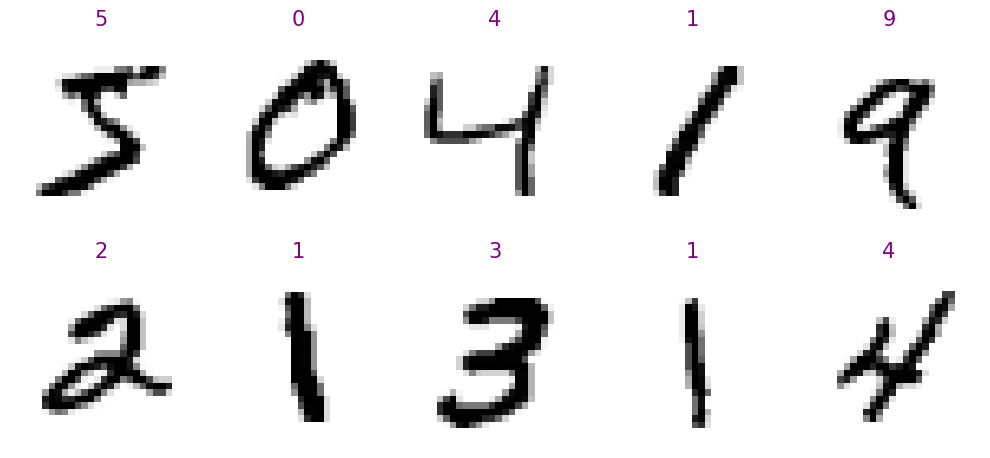

In [32]:
# when using 'islice' (from Python's itertools module), only the requested slice of the specified iterator
# is processed and temporarily held in memory; thus, we can work with large datasets
from itertools import islice
# allows access to the MNIST dataset class
import torchvision.datasets as torch_datasets

# loads the MNIST dataset (see intro for a presentation of the parameters)
mnist_dataset = torch_datasets.MNIST("./", 'train', download=True)
# checks if it's a valid Dataset (for debugging)
assert isinstance(mnist_dataset, torch.utils.data.Dataset)

# retrieves the first example from the dataset : 'iter(mnist_dataset)' converts the dataset into an iterator;
# then 'next()' extracts the next item (here the first)
example = next(iter(mnist_dataset))
print(BB + "The first item of the dataset has type :" + MB, example, "\n\n")

# initializes a figure object of size 10*5 inches (potentially downscaled) where subplots will be added
fig = plt.figure(figsize=(10, 5))
# Loops over the first 10 samples in the dataset : 'enumerate(mnist_dataset)' enumerates the dataset items
# with an index; and 'islice(..., 10)' limits the enumeration to 10 items (avoiding to store the whole dataset)
for i, (img, label) in islice(enumerate(mnist_dataset), 10):
    # adds a 2*5 grid of subplots; 'matplotlib' requires subplot indices to start at 1, but here the first
    # value for 'i' will be 0, so we need to add 1
    ax = fig.add_subplot(2, 5, i+1)
    # removes axes (and their ticks) for a cleaner appearance
    ax.axis('off')
    # sets the title of the subplot    
    ax.set_title(str(label), size=15, color="purple")
    # displays 'img' in the subplot
    ax.imshow(img, cmap='gray_r')
# adjusts the spacing between subplots
plt.tight_layout()
# displays the figure with all the subplots
plt.show()

<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The book also download the <font color='green'>CelebA</font> dataset, with torchvision.datasets.CelebA (https://pytorch.org/vision/main/generated/torchvision.datasets.CelebA.html).<br>$\quad$
        The description provided by <font color='green'>torchvision.datasets.CelebA</font> helps us understand
the structure of this dataset :<br>
    * The database has three subsets, <font color='green'>train</font>, <font color='green'>valid</font>, and <font color='green'>test</font>. We can select a specific subset or load all of them<br>
    * The images are stored in <font color='green'>PIL.Image</font> format (see intro to "2c. Creating a dataset from files stored locally" for a short presentation of <font color='green'>PIL</font>). And we can obtain a transformed version using a custom transform function, such as <font color='green'>transforms.ToTensor</font> and <font color='green'>transforms.Resize</font><br>
    * There are different types of targets we can use, eg <font color='green'>identity</font>, <font color='green'>attributes</font>, and <font color='green'>landmarks</font>. <font color='green'>identity</font> is the person ID for an image; <font color='green'>attributes</font> corresponds to $40$ facial attributes for the person in the image, such as facial expression, makeup, hair properties, and so on; and <font color='green'>landmarks</font> refers to the dictionary of extracted facial points, such as the position of the eyes, nose, and so on

<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500"><font color='darkblue'>$\quad$
        This dataset is not easy to download. It seems possible, via the Kaggle website, but the zip file is already 3GB in size. This dataset will be used in part 14, and I will download it there.<br>$\quad$        

<a id="3"></a><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>3. BUILDING AN ANN IN PYTORCH</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3a. torch.nn, the PyTorch NN module</font><a id="3a"></a></p>$\quad$
        In the previous chapter, "2. Datasets and DataLoaders" we have seen that all our datasets (eg <font color='green'>JointDataset</font> in cell $18$ or <font color='green'>ImageDataset</font> in cell $26$ completed in cell $29$) should be subclasses of the almost empty PyTorch's class <font color='green'>Dataset</font> (introduced in "2b. Subclasses of Dataset"). In the same way all our neural networks should be subclasses of <font color='green'>torch.nn.Module</font>. If they themselves contain neural networks, these sub-neural-networks should also be subclasses of <font color='green'>torch.nn.Module</font>. Also, all layers have <font color='green'>torch.nn.Module</font> as their ancestor. This nested structure allows for building and managing complex architectures easily. Contrary to <font color='green'>Dataset</font>, <font color='green'>torch.nn.Module</font> contains a ton of methods, presented here : https://pytorch.org/docs/stable/generated/torch.nn.Module.html<br>$\quad$
        <font color='green'>torch.nn.Module</font> is a class of <font color='green'>torch.nn</font>. <font color='green'>torch.nn</font> provides all the building blocks we need to build our neural networks (eg loss functions, activation functions, all types of layers,...). In order to see the benefits of using <font color='green'>torch.nn</font>, we will first train a basic linear regression model on a toy dataset without using any features from the <font color='green'>torch.nn</font> module; we will use nothing but the basic PyTorch tensor operations. Then, we will incrementally add features from <font color='green'>torch.nn</font>.<br>$\quad$
        First, let’s create a toy dataset in NumPy and visualize it. Our dataset is composed of $10$ instances having only $1$ feature, an integer ranging from $0$ to $9$ (value $i\!-\!1$ for the $i$-th instance). Since PyTorch uses <font color='green'>float32</font> numbers by default, we instruct NumPy to use this default type (instead of its own default, which is <font color='green'>float64</font>) :

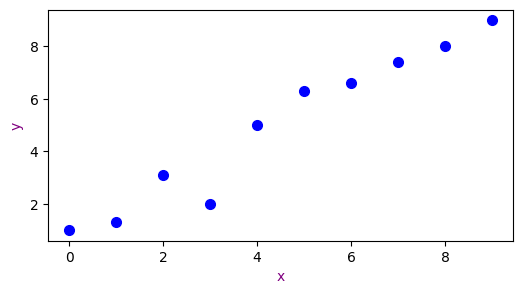

In [33]:
plt.figure(figsize=(6, 3))
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,7.4, 8.0, 9.0], dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=7, color="blue")
plt.xlabel('x', color="purple")
plt.ylabel('y', color="purple")
plt.show()

<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        When we do not need our own custom <font color='green'>\_\_getitem__</font> and <font color='green'>\_\_len__</font> methods, and only want the Pytorch instance of <font color='green'>Dataset</font> corresponding to an input matrix and a target vector in Pytorch tensor format, we can use the <font color='green'>TensorDataset(input_features, labels)</font> class, which is a subclass of <font color='green'>Dataset</font>.<br>$\quad$
        Here, we first standardize the features of our input matrix (mean centering and dividing by the standard deviation). Then we convert our Numpy arrays into Pytorch tensors, so we can build our dataset using <font color='green'>TensorDataset</font>. Once our dataset is defined, we can use the <font color='green'>torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False, drop_last=False)</font> class (presented in "2a. Creating a DataLoader from existing tensors") in order to iterate through the individual elements in our dataset :

In [34]:
from torch.utils.data import TensorDataset
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Let's define the parameters of our model, <font color='green'>weight</font> and <font color='green'>bias</font>, the <font color='green'>model</font> function to compute the output of our model from the input data, and the loss function <font color='green'>loss_fn</font> (here the $M\!S\!E$) that we want to minimize :

In [35]:
torch.manual_seed(1)
weight = torch.randn(1)
# see next paragraph for a short presentation, or the next part for a more complete overview
weight.requires_grad_()
# we can do both operations in one step :
bias = torch.zeros(1, requires_grad=True)

# computes the output from the input
def model(xb):
    return weight * xb + bias

# computes the MSE
def loss_fn(input, target):
    return (input-target).pow(2).mean()

<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Note that initializing a variable, say <font color='darkred'>var</font>, with '<font color='green'>requires_grad=True</font>', or, equivalently, applying the <font color='green'>.requires_grad_()</font> to it, basically asks Pytorch to create a node each time an operation is done involving <font color='darkred'>var</font>. Typically, <font color='darkred'>var</font> will be a weight or a bias, and the operations done on it will be a multiplication or an addition. During the forward pass the nodes are created; the resulting graph is called the <font color='darkpink'>computation graph</font>. During the backward pass (backpropagation), Pytorch will be able to compute the derivative of the loss function, say <font color='darkred'>loss</font>, with respect to <font color='darkred'>var</font>; this is done by calling <font color='green'>loss.backward()</font>. Then the value of the derivative will be <font color='green'>var.grad</font>.<br>
    '<font color='green'>.backward()</font>' is a function of the PyTorch's built-in differentiation engine <font color='green'>torch.autograd</font>. It will be presented in more detail in the next part.<br>$\quad$
        For now, we can use all this to compute the loss function at the end of each epoch. We use $201$ epochs with a constant learning rate of $0.001$ and print the losses every $10$ epochs (note that since the weight and bias are not initialized here but in the previous cell, re-running the next code will continue the algorithm rather than restart it). At the end of the training phase, we print the values of the weight and the bias :

In [36]:
# sets the learning rate (for SGD), the number of iterations, and the interval (in numbers of iterations) at
# which the loss is logged
learning_rate = 0.001
n_epochs = 201
log_epochs = 10

for epoch in range(n_epochs):
    # 'train_dl' is the Dataloader instance defined in cell 34
    for x_batch, y_batch in train_dl:
        # 'model' and 'loss_fn' are defined in the previous cell
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        # performs backpropagation to compute the gradients of the loss with respect to the model parameters
        loss.backward()
    # disables gradient tracking for the parameter update steps to save memory and improve performance
    with torch.no_grad():
        weight -= learning_rate * weight.grad
        bias -= learning_rate * bias.grad
        # resets the gradient of the weight and bias to zero for the next training iteration (otherwise
        # gradients accumulate additively...)
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0 :
        print(BB + "Epoch :" + MB, epoch, BB + "; Loss :" + MB, round(loss.item(), 4))
print(BB + "\nFinal parameters :\n\tweight : " + MB, round(weight.item(), 4),
      BB + "\n\tbias :" + MB, round(bias.item(), 4))

Epoch : 0 ; Loss : 46.572
Epoch : 10 ; Loss : 27.1502
Epoch : 20 ; Loss : 1.6446
Epoch : 30 ; Loss : 14.4571
Epoch : 40 ; Loss : 11.7827
Epoch : 50 ; Loss : 6.4122
Epoch : 60 ; Loss : 0.6339
Epoch : 70 ; Loss : 3.1562
Epoch : 80 ; Loss : 2.01
Epoch : 90 ; Loss : 0.3107
Epoch : 100 ; Loss : 0.7625
Epoch : 110 ; Loss : 1.0024
Epoch : 120 ; Loss : 0.0232
Epoch : 130 ; Loss : 0.5138
Epoch : 140 ; Loss : 0.0741
Epoch : 150 ; Loss : 1.8712
Epoch : 160 ; Loss : 0.0007
Epoch : 170 ; Loss : 0.085
Epoch : 180 ; Loss : 0.0634
Epoch : 190 ; Loss : 0.0012
Epoch : 200 ; Loss : 0.104

Final parameters :
	weight :  2.6717 
	bias : 4.8843


<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Let's plot the linear estimator we just obtained. Instead of tracing the straight line with the weight as the slope and the bias as the intercept, we compute the estimations for $100$ points evenly spaced from $0$ to $9$ :

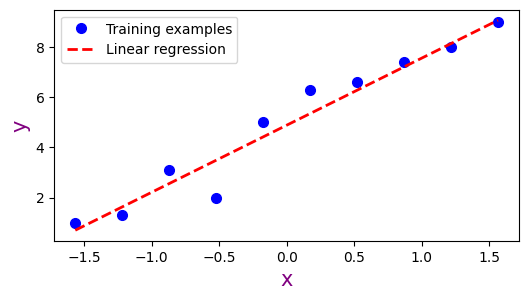

In [37]:
# X_test is a matrix containing 100 instances with only 1 feature; the feature column is composed of numbers
# of type 'float32' (PyTorch's default type), evenly spaced from 0 to 9 (both included)
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
# since the estimator has been obtained from a standardized training matrix, we need to first transform our
# new instances accordingly
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
# converts the NumPy array 'X_test_norm' into its PyTorch tensor equivalent but keeps the name
X_test_norm = torch.from_numpy(X_test_norm)
# applies 'model' (defined in cell 35) to it; 'detach' specifies to not track the gradients (here we merely
# compute estimations); and '.numpy' converts the estimation vector into a NumPy array
y_pred = model(X_test_norm).detach().numpy()
plt.figure(figsize=(6, 3))
# 'plt.gca()' (gca = get current axes) returns the current axes of the plot, or creates a new set of axes if
# none exist; this allows us to specify their labels, ticks,...
ax = plt.gca()
# plots the training data (X_train_norm, y_train) as blue dots of size 7 points (approximately 7px)
plt.plot(X_train_norm, y_train, 'o', markersize=7, color="blue")
# plots the test predictions (X_test_norm, y_pred) as a red dashed line of width 2 points (approximately 2px)
plt.plot(X_test_norm, y_pred, '--', lw=2, color="red")
# adds a legend with labels for the two plots
plt.legend(["Training examples", "Linear regression"], fontsize=10)
ax.set_xlabel('x', size=15, color="purple")
ax.set_ylabel('y', size=15, color="purple")
ax.tick_params(axis='both', labelsize=10)
plt.show()

<br><div style="font-family: Arial; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3b. Linear regression with torch.nn and torch.optim</font><a id="3b"></a></p>
    <p style="margin: 0; font-size: 14px; font-weight: 500">$\quad$
        <font color='green'>torch.nn</font> provides functions to compute the loss to minimize, and classes to build our model, while <font color='green'>torch.optim</font> provides the optimization algorithms to update the parameters of the model using the derivatives of the loss function with respect to these parameters. As we have seen above, these derivatives are computed by calling <font color='green'>loss.backward()</font>.<br>$\quad$
        PyTorch's built-in loss functions are numerous : https://pytorch.org/docs/stable/nn.html#loss-functions. We will use <font color='green'>torch.nn.MSELoss(reduction='mean')</font>, where the choices for the <font color='green'>reduction</font> parameter are <font color='green'>'mean'</font> (the default; <font color='green'>MSELoss</font> will return the mean of the squares of the errors, ie the differences between the predictions and the targets), <font color='green'>'sum'</font> (<font color='green'>MSELoss</font> will return the sum of the squares of the errors), and <font color='green'>None</font> (<font color='green'>MSELoss</font> will return the tensor of the squares of the errors, its $i$-th component being the square of the error on the $i$-th instance).

<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The PyTorch class for models whose output is an affine transformation of the input (alike our <font color='green'>model</font> function defined in cell $35$) is <font color='green'>torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)</font>, where :<br>
    * <font color='green'>in_features</font> specifies the length of an instance (eg the number $n$ of features)<br>
    * <font color='green'>out_features</font> specifies the length of an output sample (eg the number $K$ of classes in one-hot encoded representations of predicted classes)<br>
    * <font color='green'>bias=True</font> specifies whether or not the model should use a bias<br>
    * <font color='green'>device=None</font> specifies where the computations are performed (obviously, the input tensor should be stored on this device, and the output tensor will be stored on this device); choices are <font color='green'>'cpu'</font>, <font color='green'>'cuda'</font> (for gpu), and <font color='green'>None</font> (for the default device)<br>
    * <font color='green'>dtype=None</font> specifies the data type of the parameters; choices are <font color='green'>torch.float32</font>, <font color='green'>torch.float64</font>, or <font color='green'>None</font> for the default data type (which, by default, is <font color='green'>torch.float32</font> in PyTorch, but can be changed globally by <font color='green'>torch.set_default_dtype(torch.float64)</font>)<br>$\quad$
        <font color='green'>torch.nn.Linear</font> will implicitely use a weight matrix <font color='green'>$W$</font> of shape (<font color='green'>out_features</font>, <font color='green'>in_features</font>) and a bias vector <font color='green'>$b$</font> of length <font color='green'>out_features</font> (if required), both as PyTorch tensors, and compute the output <font color='green'>$y$</font> from any input <font color='green'>$x$</font> by $\,y=Wx+b\,$. Each component of both <font color='green'>$W$</font> and <font color='green'>$b$</font> are initialized from the uniform law over $\left[\frac{-1}{\sqrt{n}}, \frac{1}{\sqrt{n}}\right]$, and then updated at each call of the optimizer.<br>$\quad$

<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        For our optimizer, we will use the SGD, which is implemented in PyTorch's class <font color='green'>torch.optim.SGD(params, lr=0.001, weight_decay=0, momentum=0, dampening=0, nesterov=False)</font> (there are other parameters that I won't present here since these are more than enough), where :<br>
    * <font color='green'>params</font> specifies an iterable (usually a list) specifying the parameters to update; this iterable will usually be <font color='green'>model.parameters()</font><br>
    * <font color='green'>params</font> specifies the <font color='darkpink'>learning rate</font> <font color='darkred'>$\,\eta\,$</font>; at step $s\!+\!1$ the parameter $\theta$ will be updated via <font color='darkred'>$\theta_{s+1} = \theta_s - \eta \, u_{s+1}$</font> where, in absence of weight decay and momentum, <font color='darkred'>$\,u_{s+1} = \nabla_\theta \mathcal{L}\left(\theta_s\right)$</font>, <font color='darkred'>$\mathcal{L}$</font> being the loss function</font><br>
    * <font color='green'>weight_decay=0</font> specifies the <font color='darkpink'>weight_decay</font> <font color='darkred'>$\,\lambda\,$</font>, ie the multiple of $L^2$-regularization to add to the loss function (to prevent overfitting); we'd have <font color='darkred'>$\,u_{s+1} = \nabla_\theta \mathcal{L}\left(\theta_s\right) + \lambda \, \theta_s$</font><br>
    * <font color='green'>momentum=0</font> specifies a <font color='darkpink'>momentum</font>, ie a value <font color='darkred'>$\,\mu \!\in\! [0; 1]\,$</font> that accelerates the optimizer in the direction of past gradients for faster convergence and reduced oscillations; this introduces another sequence <font color='darkred'>$\left(v_s\right)_{s\geq1}$</font> defined by <font color='darkred'>$\, v_1 = \nabla_\theta \mathcal{L}\left(\theta_0\right)\,$</font> and <font color='darkred'>$\, v_{s+1} = \mu \, v_s + u_{s+1}\,$</font> for any <font color='darkred'>$\,s \geq 1\,$</font>; in the absence of dampening and nesterov, we'd have <font color='darkred'>$\theta_{s+1} = \theta_s - \eta \, v_{s+1}$</font><br>
    * <font color='green'>dampening=0</font> specifies a <font color='darkpink'>dampening</font>, ie a value <font color='darkred'>$\,\tau \!\in\! [0; 1]\,$</font> that dampens the momentum; here <font color='darkred'>$\, v_{s+1} = \mu \, v_s + (1\!-\!\tau) \, u_{s+1}\,$</font><br>
    * <font color='green'>nesterov=False</font> specifies whether or not to use the Nesterov momentum; if <font color='green'>nesterov=True</font> then <font color='darkred'>$\, \theta_{s+1} = \theta_s - \eta \, \left[u_{s+1} + \mu \, v_{s+1} \right]$</font><br>$\quad$
        The two most important methods of <font color='green'>torch.optim.SGD</font> are :<br>
    * <font color='green'>step()</font>, which performs a single optimization step, updating the parameters once<br>
    * <font color='green'>zero_grad(set_to_none=True)</font>, which resets the gradients of the parameters. Note that, contrary to what the book says, this is not the same as resetting them to $0$; in particular, <font color='green'>torch.optim</font> optimizers have a different behavior if the gradient is 0 or None (in one case it does the step with a gradient of 0 and in the other it skips the step altogether)

<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Now, we can rewrite our code of the previous subchapter, by using <font color='green'>torch.nn</font> and <font color='green'>torch.optim</font> :

In [38]:
loss_fn = nn.MSELoss(reduction='mean')
input_size, output_size = 1, 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(n_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate the predictions
        pred = model(x_batch)[:, 0]
        # 2. Calculate the loss
        loss = loss_fn(pred, y_batch)
        # 3. Compute the gradients
        loss.backward()
        # 4. Update the parameters using gradients
        optimizer.step()
        # 5. Reset the gradients
        optimizer.zero_grad()
    if epoch % log_epochs==0:
        print(BB + "Epoch :" + MB, epoch, BB + "; Loss :" + MB, round(loss.item(), 4))
print(BB + "\nFinal parameters :\n\tweight : " + MB, round(model.weight.item(), 4),
      BB + "\n\tbias :" + MB, round(model.bias.item(), 4))

Epoch : 0 ; Loss : 27.5217
Epoch : 10 ; Loss : 5.4938
Epoch : 20 ; Loss : 25.5754
Epoch : 30 ; Loss : 22.2742
Epoch : 40 ; Loss : 11.9622
Epoch : 50 ; Loss : 0.0745
Epoch : 60 ; Loss : 7.0669
Epoch : 70 ; Loss : 4.6566
Epoch : 80 ; Loss : 2.1235
Epoch : 90 ; Loss : 0.7432
Epoch : 100 ; Loss : 0.06
Epoch : 110 ; Loss : 1.0181
Epoch : 120 ; Loss : 0.7559
Epoch : 130 ; Loss : 0.2016
Epoch : 140 ; Loss : 0.3912
Epoch : 150 ; Loss : 0.11
Epoch : 160 ; Loss : 0.2599
Epoch : 170 ; Loss : 0.4352
Epoch : 180 ; Loss : 0.1192
Epoch : 190 ; Loss : 0.0689
Epoch : 200 ; Loss : 0.9401

Final parameters :
	weight :  2.6425 
	bias : 4.8724


<br><br><div style="font-family: Arial; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3c. The various steps for building an ANN</font><a id="3c"></a></p>
    <p style="margin: 0; font-size: 14px; font-weight: 500">$\quad$
        Here we detail the procedure for building an ANN in PyTorch. In order to illustrate the various steps, we will build a $2$-layer MLP to classify the iris dataset introduced in part $3$, "1b. Training the perceptron with scikit-learn".

<br><strong><font color='darkblue'><span style="font-size: 14px; margin-right: 5px; vertical-align: center;">$\qquad$■</span>Step 1: </font><font color='purple'>Import the dataset. Create the training Dataset and DataLoader.</font></strong><font color='darkblue'><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can import the whole dataset from <font color='green'>sklearn.datasets</font>; it is called <font color='green'>load_iris</font>. It is composed of $150$ samples. We need a training and a test datasets, so we randomly select $50$ samples for testing and keep the rest for training; this can be done using <font color='green'>train_test_split</font> from <font color='green'>sklearn.model_selection</font>.<br>$\quad$
        Once we have our training dataset, with the training matrix and the corresponding target vector, we first standardize the training matrix (mean centering and dividing by the standard deviation). Then, we convert the standardized training matrix and the target vector into PyTorch tensors. Now, we can get the training <font color='green'>Dataset</font> using the subclass <font color='green'>TensorDataset</font> (introduced in "3a. torch.nn, the PyTorch NN module"), and the associated training <font color='green'>DataLoader</font> (introduced in "2a. Creating a DataLoader from existing tensors"). Here we choose to load the data in mini-batches of size 2.

In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=1)
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
# 'torch.from_numpy(A)' transforms any NumPy array A into its PyTorch tensor counterpart
# '.float()' converts a tensor to the data type torch.float32, which is the default type in PyTorch
X_train_norm = torch.from_numpy(X_train_norm).float()
# 'y_train' is a tensor of integers (representing classes) so it should not be converted via '.float()'
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

<br><br><strong><font color='darkblue'><span style="font-size: 14px; margin-right: 5px; vertical-align: center;">$\qquad$■</span>Step 2: </font><font color='purple'>Define the model.</font></strong><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        As we said in "3a. torch.nn, the PyTorch NN module", any neural network should be a subclass of <font color='green'>torch.nn.Module</font>. Since we are building an ANN, we will use the preactivations <font color='green'>torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)</font> (that we introduced in "3b. Linear regression with torch.nn and torch.optim"). We use a bias, and we do not change the device nor the data type to perform the model computations, so we only need to specify the number of inputs and outputs for each layer. Here we only use $2$ layers. In order to be able to change these numbers easily, we use variables; the first, hidden, layer has <font color='darkred'>input_size</font> inputs (which is the number of features of the dataset) and <font color='darkred'>hidden_size</font> outputs; the second, output, layer has <font color='darkred'>hidden_size</font> inputs and <font color='darkred'>output_size</font> outputs (which is the number of classes of the dataset). In our example, we use $20$ neurons in our hidden layer; and since there are $3$ classes of iris flowers, we'll have <font color='darkred'>output_size=$3$</font>.<br>$\quad$
        For the activation functions, the book uses the sigmoid <font color='green'>torch.nn.Sigmoid()</font> for the hidden layer, and the softmax (which is the activation function of choice for output layers of multi-class classification problems, which we introduced in the previous part "1b. Examples of activation functions") <font color='green'>torch.nn.Softmax(dim=None)</font> (here we must specify <font color='green'>dim=1</font> to tell PyTorch to compute the softmax for the column (output) vectors) for the output layer.<br>$\quad$
    Note that it is often preferred to not use the softmax on the last layer, because it often involves computing large values (the exponentials) and small values (due to the the denominators, as they are sums of exponentials), thus accumulating precision problems across training epochs. In fact, we would rather not use an activation function on the last layer at all, and rather integrate an activation function to the loss function by composition; this simplifies the overall computations and adds stability when both functions combine well together (see the next step for an example). This is the approach I chose to follow.

In [40]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        # x = nn.Softmax(dim=1)(x)
        return x

input_size = X_train_norm.shape[1]
hidden_size = 20
output_size = 3
model = Model(input_size, hidden_size, output_size)

<br><br><strong><font color='darkblue'><span style="font-size: 14px; margin-right: 5px; vertical-align: center;">$\qquad$■</span>Step 3: </font><font color='purple'>Choose the loss function, the optimizer and its hyperparameters. Then train the model.</font></strong><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Let $x$ be any sample, $y=\left(y_k\right)_{k=1}^K$ its one-hot encoded true label vector, and $\hat{y}=\left(\hat{y}_k\right)_{k=1}^K$ its vector of probabilities (obtained from the softmax). Then the <font color='darkpink'>cross entropy of $x$</font> is defined as<font color='darkpink'>
    $$\mathcal{L}(x) \,=\, - \sum_{k=1}^K \, y_k \, \ln\!\left(\hat{y}_k\right) \,\qquad (4)$$</font>$\quad$
        Since all $y_k$ are equal to $0$, except the one corresponding to the true class of $x$, say $tx$, this may be written in the simpler form $\,\mathcal{L}(x) = -\ln\!\left(\hat{y}_{tx}\right)$. Considering the whole training matrix, we want to minimize the average loss<font color='darkpink'>
    $$\mathcal{L}(X) \,=\, - \frac{1}{n} \sum_{i=1}^n \, \ln\!\left(\hat{y}_{tx_i}\right) \,\qquad (5)$$</font>$\quad$
        This is called the <font color='darkpink'>negative log likelihood loss function</font>.<br>$\quad$
        If, instead of the softmax values $\left(\hat{y}_k\right)_{k=1}^K\,$, we use the <font color='darkpink'>log-softmax values</font> $\left(\tilde{y}_k := \ln\left(\hat{y}_k\right)\right)_{k=1}^K$, then the cross entropy of $x$ is $\mathcal{L}(x) = - \tilde{y}_{tx}\,$, and the negative log likelihood loss for $X$ is simply the mean of these values for the set of its instances.<br>$\quad$
        The function which to the log-softmax values associates the negative log likelihood loss for $X$ is implemented in PyTorch as <font color='green'>torch.nn.NLLLoss(weight=None, ignore_index=-100, reduction='mean')</font>, where <font color='green'>weight=None</font> is a tensor of size $K$ to give weight to each class (by default it is treated as having all components equal to $1$); <font color='green'>ignore_index=-100</font> is an integer specifying a target value that should be ignored; and <font color='green'>reduction='mean'</font> specifies whether to compute the mean of the cross entropies (alike equation $(5)$), or its sum (with <font color='green'>reduction='sum'</font>), or keep the vector of all cross entropies (with <font color='green'>reduction='none'</font>).<br>$\quad$
    Let's insist : <font color='purple'>for returning the negative log likelihood loss for $X$, <font color='green'>NLLLoss</font> needs to be applied on the log-softmax values.</font> This implies that the last layer of the model should use the log-softmax as activation function. The log-softmax function is implemented in PyTorch as <font color='green'>torch.nn.LogSoftmax(dim=None)</font>, where we must specify <font color='green'>dim=1</font> to tell PyTorch to compute the log-softmax for the column (output) vectors.<br>$\quad$
        Instead of adding a log-softmax activation function on the last layer, and then using the <font color='green'>NLLLoss</font> loss function to optimize our model, we could use no activation function on the last layer and use a loss function that would be the composition of <font color='green'>NLLLoss</font> and the log-softmax; due to the properties of $\ln$ and $\exp$, the computations would be slightly simpler and more stable. This composed function is called the <font color='darkpink'>cross entropy loss</font> and is implemented in PyTorch as <font color='green'>torch.nn.CrossEntropyLoss(weight=None, ignore_index=-100, reduction='mean')</font>, with the same parameters as for <font color='green'>NLLLoss</font>. The model's parameters (weights and biases) would be the same in both approaches. Then, if we need the softmax of the outputs, we can compute the softmax of the columns that our model would output.

<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        For our optimizer, we will use <font color='green'>torch.optim.Adam</font>, that we will present in detail in part 14.<br>$\quad$
        We use a learning rate of $0.001$ and $201$ epochs (note that the book is wrong in its computations for the means, both for the loss and for the accuracy) :

In [41]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_epochs = 201
# creates a list of length 'n_epochs' whose components are all equal to 0
loss_hist = [0] * n_epochs
accuracy_hist = [0] * n_epochs
for epoch in range(n_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        # 'y_batch.long()' converts 'y_batch' to 'long' (int64), as required by 'NLLLoss'
        loss = loss_fn(pred, y_batch.long())
        # performs backpropagation to compute the gradients of the loss with respect to the model's parameters
        loss.backward()
        # updates the model's parameters using the computed gradients and the optimizer
        optimizer.step()
        # resets the gradients to None (not zero), preventing gradients from accumulating additively across
        # multiple iterations, which is the default behavior
        optimizer.zero_grad()
        # accumulates the loss for the current batch
        loss_hist[epoch] += loss.item()
        # builds a tensor of length 2 (batch_size); a component is 1. if the true label is predicted,
        # 0. otherwise ('.float()' converts the boolean resulting from the '==' test into a float)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        # computes the mean of the accuracies for the current batch
        accuracy_hist[epoch] += is_correct.sum()
    # 'train_dl' is the DataLoader built upon the Dataset 'train_ds' (in cell 39); its '.dataset' attribute
    # returns the original dataset 'train_ds'; so to compute the means, we adds the losses (or accuracies)
    # and then divide by the number of instances, which is 'len(train_dl.dataset)'
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)
    if epoch % 10 == 0:
        print(BB + "Epoch :" + MB, epoch,
              BB + "; Loss :" + MB, round(loss.item(), 4),
              BB + "; Accuracy :" + MB, round(accuracy_hist[epoch].item(), 4))

Epoch : 0 ; Loss : 1.0498 ; Accuracy : 0.31
Epoch : 10 ; Loss : 0.8402 ; Accuracy : 0.7
Epoch : 20 ; Loss : 0.2124 ; Accuracy : 0.81
Epoch : 30 ; Loss : 0.2112 ; Accuracy : 0.89
Epoch : 40 ; Loss : 0.1634 ; Accuracy : 0.92
Epoch : 50 ; Loss : 0.4256 ; Accuracy : 0.92
Epoch : 60 ; Loss : 0.6498 ; Accuracy : 0.94
Epoch : 70 ; Loss : 0.6723 ; Accuracy : 0.95
Epoch : 80 ; Loss : 0.0252 ; Accuracy : 0.96
Epoch : 90 ; Loss : 0.1231 ; Accuracy : 0.95
Epoch : 100 ; Loss : 0.2581 ; Accuracy : 0.96
Epoch : 110 ; Loss : 0.0531 ; Accuracy : 0.95
Epoch : 120 ; Loss : 0.3093 ; Accuracy : 0.96
Epoch : 130 ; Loss : 0.31 ; Accuracy : 0.96
Epoch : 140 ; Loss : 0.7177 ; Accuracy : 0.95
Epoch : 150 ; Loss : 0.2164 ; Accuracy : 0.97
Epoch : 160 ; Loss : 0.0149 ; Accuracy : 0.97
Epoch : 170 ; Loss : 0.1606 ; Accuracy : 0.96
Epoch : 180 ; Loss : 0.1126 ; Accuracy : 0.96
Epoch : 190 ; Loss : 0.1065 ; Accuracy : 0.97
Epoch : 200 ; Loss : 0.6528 ; Accuracy : 0.97


<br><br><strong><font color='darkblue'><span style="font-size: 14px; margin-right: 5px; vertical-align: center;">$\qquad$■</span>Step 4: </font><font color='purple'>Evaluate the model on the test Dataset.</font></strong><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Since our model has been trained to predict the classes of instances that have been transformed (for standardization), we first need to transform our test dataset samples in the same way; then we convert both the updated test dataset and its target vector into PyTorch tensors; and finally we can apply our model and compute its accuracy :

In [42]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)

In [43]:
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(BB + "Accuracy on the test dataset :" + MB, round(accuracy.item(), 4))

Accuracy on the test dataset : 0.98


<br><br><strong><font color='darkblue'><span style="font-size: 14px; margin-right: 5px; vertical-align: center;">$\qquad$■</span>Step 5: </font><font color='purple'>Save the trained model.</font></strong><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        In order to save a trained model to the current directory, first choose a name for the file, then create the file path by adding a '.pt' or '.pth' extension, and use the <font color='green'>torch.save(model, path)</font> function :

In [44]:
path = 'iris_classifier.pth'
torch.save(model, path)

<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        This saves both the model architecture and all the learned parameters.<br>$\quad$
        Conversely, to load a saved model, we call <font color='green'>torch.load(path)</font> with the correct path. Or, rather, it's what worked before, when the book was published. Now, to avoid users downloading malicious files, the instructions have become convoluted :

In [45]:
# asks PyTorch to load the model on the same device (eg cpu, gpu) it was saved; should be the default,
# so i've commented it out
# torch.serialization.default_restore_location = lambda storage, loc: storage
model_new = torch.load(path, weights_only=False)

<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can then verify the model architecture by calling <font color='darkred'>model_new.eval()</font>:

In [46]:
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=3, bias=True)
)

<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can use the model as usual. For example :

In [47]:
pred_test_new = model_new(X_test_norm)
correct_new = (torch.argmax(pred_test_new, dim=1) == y_test).float()
accuracy_new = correct_new.mean()
print(BB + "Accuracy on the test dataset :" + MB, round(accuracy_new.item(), 4))

Accuracy on the test dataset : 0.98


<br><p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Alternatively, when saving for unknown users, we only save the learned parameters. And the users will only load the parameters, which is safer because the set of parameters is a dictionary and contains no executable code.<br>$\quad$
        We save the parameters like so :

In [48]:
path = 'iris_classifier_state.pth'
torch.save(model.state_dict(), path)

<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Before downloading the parameters, we need to build the model, like we did in step 2 above. Then we can feed the loaded parameters to the model, like so :

In [49]:
model_new2 = Model(input_size, hidden_size, output_size)
model_new2.load_state_dict(torch.load(path, weights_only=True))
model_new2.eval()

Model(
  (layer1): Linear(in_features=4, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=3, bias=True)
)

<p style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Then, we can use the model as usual :

In [50]:
pred_test_new2 = model_new2(X_test_norm)
correct_new2 = (torch.argmax(pred_test_new2, dim=1) == y_test).float()
accuracy_new2 = correct_new2.mean()
print(BB + "Accuracy on the test dataset :" + MB, round(accuracy_new2.item(), 4))

Accuracy on the test dataset : 0.98


<br><br><div style="font-family: Arial; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3d. Activation functions in PyTorch</font><a id="3d"></a></p>
    <p style="margin: 0; font-size: 14px; font-weight: 500">$\quad$
        In the previous part, "1b. Examples of activation functions", I have already presented the functions that are used the most often as activation functions. Here I need to present how they are called in PyTorch.<br>$\quad$
        The most often used activation function is the <font color='darkred'>sigmoid</font> $\sigma$ ($\sigma(t) = \frac{1}{1+e^{-t}}$). In PyTorch, when we want to use the sigmoid as an activation function, we use <font color='green'>torch.nn.Sigmoid()</font>, as we did in the previous subchapter, step 2; and when we want to use the sigmoid as an independent function we use <font color='green'>torch.sigmoid()</font> instead.<br>$\quad$
        The <font color='darkred'>hyperbolic tangent</font> can be seen as a rescaling of the sigmoid ($\tanh(t) = \frac{e^t-e^{-t}}{e^t+e^{-t}} = 2*\sigma(2t) - 1$). Its broader output spectrum ($]-1;1[$ instead of $]0;1[$) "can improve the convergence of the backpropagation algorithm", according to the book. In PyTorch, when we want to use $\tanh$ as an activation function, we use <font color='green'>torch.nn.Tanh()</font>; and when we want to use $\tanh$ as an independent function we use <font color='green'>torch.tanh()</font> instead.<br>$\quad$
        A well-known problem that may arise with these functions is the <font color='darkpink'>vanishing gradient problem</font> : they converge quickly towards their asymptotes, and then their derivatives are very small; eg according to PyTorch the derivative of the sigmoid at $t=20$ is <font color='darkred'>tensor(0.)</font>, and it is already as small as <font color='darkred'>tensor(4.5417e-05)</font> at $t=10$; and $\tanh$ converges even faster. As a consequence, suppose that at a node we have $z^{(l)}_i$ larger than 10; then its derivative is very small; so, according to the previous part, equation $(21)$, the error $\delta^{(l)}_i$ is likely to be very small as well, so, according to the previous part, equation $(24)$ the weights of the $i$-th row and the $i$-th component of the bias will not be updated in a meaningful way (their updates will be very very small and may even suffer from precision problems). To remedy to this problem, we can use functions whose derivatives do not become negligible.<br>$\quad$
        The most often used of these functions is the <font color='darkred'>$\mbox{ReLU}$</font> (defined by $\mbox{ReLU}(t) = \max(0,t)$). But its derivative for $t<0$ is $0$, hence it may lead to the same problem. Worse even, the neuron may be stuck at $0$, never updates, and won't contribute to the next layer since its output will always be $0$: we say it has become a <font color='darkpink'>dead neuron</font>. Dead neurons are useless. To remedy to this problem, we may use functions whose derivatives are absolutely never small, like the <font color='darkred'>$\mbox{Leaky ReLU}$</font> (defined by $\mbox{Leaky ReLU}(t) = t$ if $t>0$ and $\mbox{Leaky ReLU}(t) = \alpha \, t$ otherwise), or the <font color='darkred'>$\mbox{ELU}$</font> (defined by $\mbox{ELU}(t) = t$ if $t>0$ and $\mbox{ELU}(t) = \alpha \left(e^t-1\right)$ otherwise).<br>$\quad$
        In PyTorch, when we want to use the $\mbox{ReLU}$ as an activation function, we use <font color='green'>torch.nn.ReLU()</font>; and when we want to use the $\mbox{ReLU}$ as an independent function we use <font color='green'>torch.relu()</font> instead.<br>
    When we want to use the $\mbox{Leaky ReLU}$ as an activation function, we use <font color='green'>torch.nn.LeakyReLU()</font>; and when we want to use the $\mbox{Leaky ReLU}$ as an independent function we use <font color='green'>torch.nn.functional.leaky_relu()</font> instead.<br>
    At last, when we want to use the $\mbox{ELU}$ as an activation function, we use <font color='green'>torch.nn.ELU()</font>; and when we want to use the $\mbox{ELU}$ as an independent function we use <font color='green'>torch.nn.functional.elu()</font> instead.